In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/liu/Desktop/data_set_hackathon.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_date               2420 non-null   object 
 1   requested_delivery_date  2420 non-null   object 
 2   Customer Country Code    2420 non-null   object 
 3   Product Code             2420 non-null   object 
 4   Description              2420 non-null   object 
 5   order_type               2420 non-null   object 
 6   Customer Order Code      2420 non-null   int64  
 7   value                    2420 non-null   float64
 8   Curr                     2420 non-null   object 
 9   items                    2420 non-null   object 
 10  Route                    2420 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 208.1+ KB


In [4]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001
...,...,...,...,...,...,...,...,...,...,...,...
2415,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003
2416,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003
2417,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003
2418,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003


In [5]:
df['Customer Country Code'].unique()

array(['RU', 'DK', 'NO', 'FI', 'NL', 'ES', 'IT', 'FR', 'CH', 'PT', 'SE',
       'AT', 'DE', 'SK', 'CZ', 'PL', 'BY', 'BG', 'US', 'CY', 'RO', 'BE',
       'SI', 'EE', 'HR', 'GB', 'GR', 'GL', 'XK', 'AD', 'CE'], dtype=object)

In [6]:
#Define countries areas
eastern_europe = ['RU', 'BG', 'CZ', 'HU', 'PL', 'RO', 'SK', 'EE', 'LV', 'LT']
western_europe = ['AT', 'BE', 'FR', 'DE', 'IT', 'NL', 'CH', 'GB', 'ES', 'PT', 'IE']
nordic_countries = ['DK', 'FI', 'IS', 'NO', 'SE']

#Create a column which identifies each country
def get_region(country_code):
    if country_code in eastern_europe:
        return 1
    elif country_code in western_europe:
        return 2
    elif country_code in nordic_countries:
        return 3
    else:
        return 4

#Apply into the region
df['Region'] = df['Customer Country Code'].apply(get_region)

In [7]:
df['Curr'].unique()

array(['RUB', 'DKK', 'NOK', 'EUR', 'CHF', 'SEK', 'CZK', 'PLN', 'GBP'],
      dtype=object)

In [8]:
exchange_rates = {
    'RUB': 0.013,  # 1 RUB = 0.013 EUR
    'DKK': 0.134,  # 1 DKK = 0.134 EUR
    'NOK': 0.1,    # 1 NOK = 0.1 EUR
    'EUR': 1,      # 1 EUR = 1 EUR
    'SEK': 0.098,  # 1 SEK = 0.098 EUR
    'CHF': 0.93,   # 1 CHF = 0.93 EUR
    'CZK': 0.039,  # 1 CZK = 0.039 EUR
    'PLN': 0.22,   # 1 PLN = 0.22 EUR
    'GBP': 1.16    # 1 GBP = 1.16 EUR
}

In [9]:
df['value'] = df.apply(lambda row: row['value'] * exchange_rates[row['Curr']], axis=1)

In [10]:
df['Curr'] = 'EUR'

In [11]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Region
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,30.38100,EUR,6,RU0001,1
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,132.08325,EUR,23,RU0001,1
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,38.90250,EUR,7,RU0001,1
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,52.79625,EUR,9,RU0001,1
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,28.71375,EUR,5,RU0001,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2415,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52000,EUR,12,FI0003,4
2416,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52000,EUR,12,FI0003,4
2417,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52000,EUR,12,FI0003,4
2418,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10000,EUR,10,FI0003,4


In [12]:
df['items'] = pd.to_numeric(df['items'], errors='coerce')
# Convert Order Date and Requested Delivery Date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%d.%m.%Y')
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'], format='%d.%m.%Y')

# Calculate the lead time
df['lead_time'] = (df['requested_delivery_date'] - df['order_date']).dt.days

In [13]:
#Drop duplicate numbers if the dataset has.
df.drop_duplicates(inplace=True)

In [14]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Region,lead_time
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,30.38100,EUR,6.0,RU0001,1,199
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,132.08325,EUR,23.0,RU0001,1,252
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,38.90250,EUR,7.0,RU0001,1,203
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,52.79625,EUR,9.0,RU0001,1,202
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,28.71375,EUR,5.0,RU0001,1,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52000,EUR,12.0,FI0003,4,217
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52000,EUR,12.0,FI0003,4,217
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52000,EUR,12.0,FI0003,4,217
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10000,EUR,10.0,FI0003,4,217


<Axes: xlabel='month'>

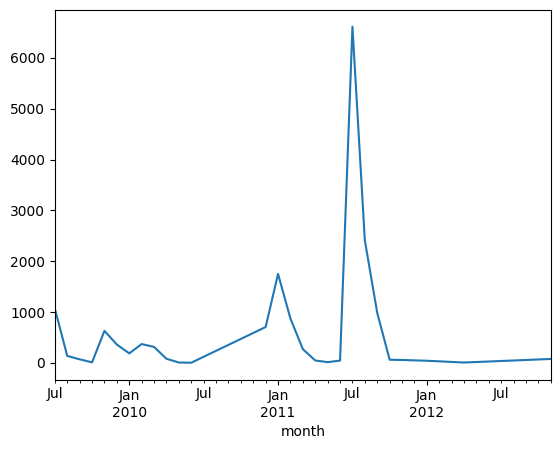

In [15]:
df['month'] = df['order_date'].dt.to_period('M')
monthly_demand = df.groupby('month')['items'].sum()
monthly_demand.plot()

In [16]:
historical_orders = df.groupby(['Customer Country Code', 'month']).size()
historical_orders.head()

Customer Country Code  month  
AD                     2011-09    13
                       2011-10     1
AT                     2010-01     1
                       2010-02     1
                       2010-03    11
dtype: int64

In [17]:
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

In [18]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Region,lead_time,month,year
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,30.38100,EUR,6.0,RU0001,1,199,7,2009
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,132.08325,EUR,23.0,RU0001,1,252,7,2009
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,38.90250,EUR,7.0,RU0001,1,203,7,2009
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,52.79625,EUR,9.0,RU0001,1,202,7,2009
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,28.71375,EUR,5.0,RU0001,1,195,7,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52000,EUR,12.0,FI0003,4,217,7,2011
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52000,EUR,12.0,FI0003,4,217,7,2011
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52000,EUR,12.0,FI0003,4,217,7,2011
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10000,EUR,10.0,FI0003,4,217,7,2011


In [19]:
df['price'] = df['value'] / df['items']

In [20]:
df['Product Code'].unique()

array(['L10705000', 'L10705100', 'L10705200', 'L10705300', 'L10705400',
       'L10705500', 'L10705600', 'L10705700', 'L10850600', 'L10850700',
       'L10850800', 'L10850900', 'L10852800', 'L10852900', 'L10853100',
       'L12134400', 'L12134500', 'L12134600', 'L12134700', 'L12135800',
       'L12135900', 'L12136000', 'L12136100', 'L12916800', 'L12916900',
       'L12917000', 'L12917100', 'L12917700', 'L12917800', 'L12917900',
       'L12918000', 'L12918400', 'L12918500', 'L12918600', 'L12918700',
       'L12918800', 'L12918900', 'L12919000', 'L12919100', 'L12919200'],
      dtype=object)

In [21]:
codes, uniques = pd.factorize(df['Product Code'])
df['Product Code Mapped'] = codes + 1

In [22]:
df['Product Code Mapped']

0        1
1        1
2        1
3        1
4        1
        ..
2415    40
2416    40
2417    40
2418    40
2419    40
Name: Product Code Mapped, Length: 2417, dtype: int64

In [23]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Region,lead_time,month,year,price,Product Code Mapped
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,30.38100,EUR,6.0,RU0001,1,199,7,2009,5.06350,1
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,132.08325,EUR,23.0,RU0001,1,252,7,2009,5.74275,1
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,38.90250,EUR,7.0,RU0001,1,203,7,2009,5.55750,1
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,52.79625,EUR,9.0,RU0001,1,202,7,2009,5.86625,1
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,28.71375,EUR,5.0,RU0001,1,195,7,2009,5.74275,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52000,EUR,12.0,FI0003,4,217,7,2011,10.71000,40
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52000,EUR,12.0,FI0003,4,217,7,2011,10.71000,40
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52000,EUR,12.0,FI0003,4,217,7,2011,10.71000,40
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10000,EUR,10.0,FI0003,4,217,7,2011,10.71000,40


In [24]:
# Filter orders with a lead time of more than 30 days (advance demand)
advance_demand_df = df[df['lead_time'] > 30]

In [25]:
advance_demand_df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Region,lead_time,month,year,price,Product Code Mapped
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,30.38100,EUR,6.0,RU0001,1,199,7,2009,5.06350,1
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,132.08325,EUR,23.0,RU0001,1,252,7,2009,5.74275,1
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,38.90250,EUR,7.0,RU0001,1,203,7,2009,5.55750,1
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,52.79625,EUR,9.0,RU0001,1,202,7,2009,5.86625,1
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,28.71375,EUR,5.0,RU0001,1,195,7,2009,5.74275,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52000,EUR,12.0,FI0003,4,217,7,2011,10.71000,40
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52000,EUR,12.0,FI0003,4,217,7,2011,10.71000,40
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52000,EUR,12.0,FI0003,4,217,7,2011,10.71000,40
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10000,EUR,10.0,FI0003,4,217,7,2011,10.71000,40


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2417 entries, 0 to 2419
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2417 non-null   datetime64[ns]
 1   requested_delivery_date  2417 non-null   datetime64[ns]
 2   Customer Country Code    2417 non-null   object        
 3   Product Code             2417 non-null   object        
 4   Description              2417 non-null   object        
 5   order_type               2417 non-null   object        
 6   Customer Order Code      2417 non-null   int64         
 7   value                    2417 non-null   float64       
 8   Curr                     2417 non-null   object        
 9   items                    2072 non-null   float64       
 10  Route                    2417 non-null   object        
 11  Region                   2417 non-null   int64         
 12  lead_time                2417 non-null 

In [27]:
df = df.dropna(subset=['items', 'price'])

In [28]:
advance_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 0 to 2419
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2392 non-null   datetime64[ns]
 1   requested_delivery_date  2392 non-null   datetime64[ns]
 2   Customer Country Code    2392 non-null   object        
 3   Product Code             2392 non-null   object        
 4   Description              2392 non-null   object        
 5   order_type               2392 non-null   object        
 6   Customer Order Code      2392 non-null   int64         
 7   value                    2392 non-null   float64       
 8   Curr                     2392 non-null   object        
 9   items                    2047 non-null   float64       
 10  Route                    2392 non-null   object        
 11  Region                   2392 non-null   int64         
 12  lead_time                2392 non-null 

In [29]:
advance_demand_df = advance_demand_df.dropna(subset=['items', 'price'])

In [30]:
# Prepare data for logistic regression
X = advance_demand_df[['price', 'month','year','Region']]  # example features
y = advance_demand_df['Product Code Mapped']  # target variable

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict choice probabilities
predicted_probabilities = model.predict_proba(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
predicted_probabilities

array([[0.01449382, 0.00375876, 0.007078  , ..., 0.0809413 , 0.02936754,
        0.08048849],
       [0.00357552, 0.00158759, 0.00251007, ..., 0.01095369, 0.00793464,
        0.01106466],
       [0.01423237, 0.00281786, 0.00604918, ..., 0.09014507, 0.03011981,
        0.08120244],
       ...,
       [0.01048281, 0.00330621, 0.00558142, ..., 0.07142155, 0.03344334,
        0.06744845],
       [0.0106415 , 0.00292683, 0.00680304, ..., 0.01395687, 0.01275743,
        0.01160387],
       [0.0249733 , 0.00385728, 0.01169304, ..., 0.03915472, 0.02284758,
        0.0300245 ]])

In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, model.predict(X_test))
accuracy

0.14390243902439023

In [34]:
advance_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2047 entries, 0 to 2419
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2047 non-null   datetime64[ns]
 1   requested_delivery_date  2047 non-null   datetime64[ns]
 2   Customer Country Code    2047 non-null   object        
 3   Product Code             2047 non-null   object        
 4   Description              2047 non-null   object        
 5   order_type               2047 non-null   object        
 6   Customer Order Code      2047 non-null   int64         
 7   value                    2047 non-null   float64       
 8   Curr                     2047 non-null   object        
 9   items                    2047 non-null   float64       
 10  Route                    2047 non-null   object        
 11  Region                   2047 non-null   int64         
 12  lead_time                2047 non-null 

In [35]:
import statsmodels.api as sm

# Get unique regions from the DataFrame
regions = advance_demand_df['Region'].unique()


In [36]:
import statsmodels.api as sm
# Build SARIMA model for each region
for i in regions:
    # Filter the region
    region_df = advance_demand_df[advance_demand_df['Region'] == i]
    region_df = region_df.drop(['requested_delivery_date'], axis = 1)
    #Sort datetime
    region_df.sort_values('order_date', inplace=True)

    region_df.set_index('order_date', inplace=True)

    region_df = region_df.resample('S').sum()

    p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12

    sarima_model = sm.tsa.statespace.SARIMAX(region_df['items'],
                                              order=(p, d, q),
                                              seasonal_order=(P, D, Q, s),
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
    sarima_results = sarima_model.fit()

    print(f'Region: {i}')
    print(sarima_results.summary())

    sarima_results.plot_diagnostics(figsize=(10, 8))
    plt.show()

KeyboardInterrupt: 

/var/folders/n0/ybgqz5zd2cx4wbm8cv8vr3gr0000gn/T/ipykernel_15026/804362487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  advance_demand_df['order_date'] = pd.to_datetime(advance_demand_df['order_date'])
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45992D+00    |proj g|=  9.13645D-02

At iterate    5    f=  5.41693D+00    |proj g|=  1.01858D-02

At iterate   10    f=  5.41607D+00    |proj g|=  8.86795D-04

At iterate   15    f=  5.41606D+00    |proj g|=  6.53157D-04

At iterate   20    f=  5.41494D+00    |proj g|=  1.15266D-02

At iterate   25    f=  5.37202D+00    |proj g|=  2.55771D-02

At iterate   30    f=  5.36502D+00    |proj g|=  3.88806D-04

At iterate   35    f=  5.36488D+00    |proj g|=  4.21272D-03

At iterate   40    f=  5.36457D+00    |proj g|=  1.15963D-03

At iterate   45    f=  5.36439D+00    |proj g|=  5.91302D-04

At iterate   50    f=  5.36436D+00    |proj g|=  4.55615D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


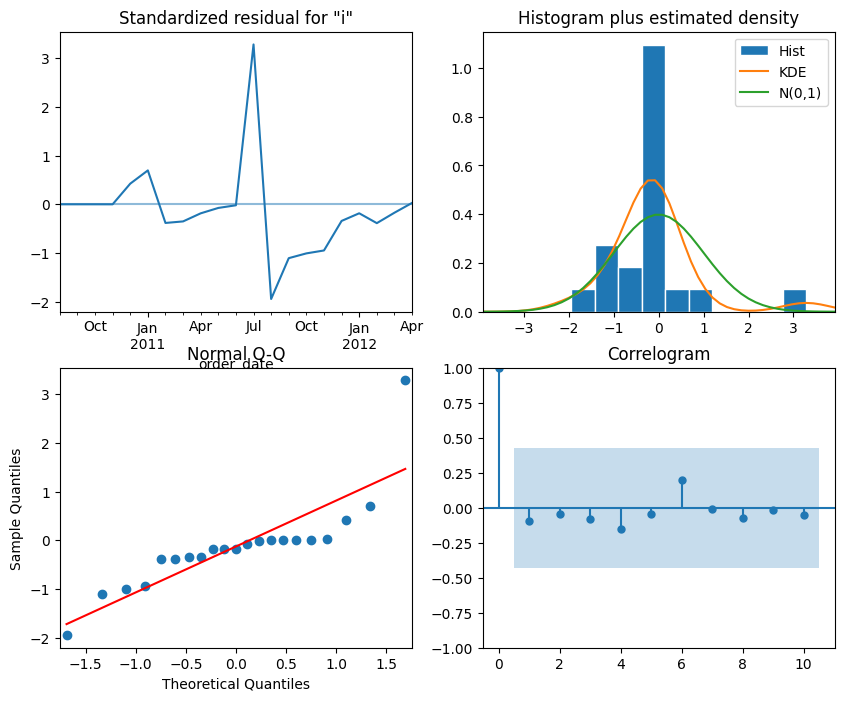

In [ ]:
import statsmodels.api as sm

# Assuming `df` is your DataFrame and you have a 'Date' column and a 'Demand' column
advance_demand_df['order_date'] = pd.to_datetime(advance_demand_df['order_date'])
advance_demand_df = advance_demand_df.drop(['requested_delivery_date'], axis = 1)
advance_demand_df.set_index('order_date', inplace=True)
# Let's assume a monthly time series, hence 'M'
advance_demand_df = advance_demand_df.resample('M').sum()


# Define the parameters for the SARIMA model
# These should be chosen based on model diagnostics and ACF/PACF plots
p = 1 # Autoregressive term
d = 1 # Differencing
q = 1 # Moving average term
P = 1 # Seasonal autoregressive term
D = 1 # Seasonal differencing
Q = 1 # Seasonal moving average term
s = 12 # Seasonal periodicity 

# Build and fit the SARIMA model
sarima_model = SARIMAX(advance_demand_df['items'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

# Summarize the model results
print(sarima_results.summary())

import matplotlib.pyplot as plt

sarima_results.plot_diagnostics(figsize=(10, 8))
plt.show()

In [ ]:
forecast_value = sarima_results.get_forecast(steps=1).predicted_mean[0]

In [ ]:
forecast_values = sarima_results.get_forecast(steps=12).predicted_mean

In [ ]:
forecast_values

2012-05-31      22.810898
2012-06-30      63.225596
2012-07-31     143.855091
2012-08-31     101.432346
2012-09-30      87.848472
2012-10-31      77.896569
2012-11-30      69.893624
2012-12-31     778.191155
2013-01-31    1826.078557
2013-02-28     944.397243
2013-03-31     344.638797
2013-04-30     125.341582
Freq: M, Name: predicted_mean, dtype: float64

In [ ]:
df_predicted_probabilities = pd.DataFrame(predicted_probabilities, columns=['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40'])
df_predicted_probabilities

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,0.014494,0.003758,0.007078,0.007833,0.008651,0.006987,0.009917,0.006105,0.030814,0.007577,...,0.033039,0.029384,0.020871,0.015378,0.028982,0.020811,0.033387,0.080941,0.029368,0.080488
1,0.003575,0.001587,0.002510,0.002682,0.002647,0.002481,0.002879,0.002208,0.072550,0.008620,...,0.003952,0.003220,0.002481,0.002459,0.003634,0.006363,0.004926,0.010954,0.007935,0.011065
2,0.014232,0.002817,0.006049,0.006841,0.008011,0.006047,0.009465,0.005030,0.009295,0.003306,...,0.041954,0.047837,0.035366,0.020734,0.042102,0.017768,0.041379,0.090144,0.030120,0.081201
3,0.001356,0.000829,0.000800,0.000802,0.000638,0.000660,0.000733,0.000904,0.014543,0.008076,...,0.246750,0.000823,0.000500,0.000387,0.000739,0.010949,0.006746,0.038654,0.013284,0.045921
4,0.014494,0.003758,0.007078,0.007833,0.008651,0.006987,0.009917,0.006105,0.030814,0.007577,...,0.033039,0.029384,0.020871,0.015378,0.028982,0.020811,0.033387,0.080941,0.029368,0.080488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.018957,0.002071,0.006777,0.008162,0.011643,0.007471,0.014044,0.004795,0.002563,0.000786,...,0.007832,0.163649,0.136622,0.065845,0.138056,0.009314,0.044168,0.057055,0.019796,0.043158
406,0.004739,0.001735,0.003268,0.003579,0.003805,0.003388,0.004148,0.002664,0.065087,0.006457,...,0.001851,0.005921,0.004947,0.004633,0.006641,0.005627,0.005421,0.009120,0.007788,0.008398
407,0.010483,0.003306,0.005581,0.006066,0.006226,0.005360,0.007169,0.004984,0.030773,0.009156,...,0.058847,0.017817,0.013251,0.009101,0.016403,0.021680,0.028135,0.071422,0.033444,0.067448
408,0.010641,0.002926,0.006803,0.007683,0.008982,0.007407,0.009899,0.005108,0.067266,0.006272,...,0.001617,0.021371,0.019228,0.016089,0.023234,0.008061,0.010958,0.013957,0.012758,0.011604


In [ ]:
df_predicted_probabilities.mean()

1     0.014371
2     0.003091
3     0.007037
4     0.008022
5     0.009725
6     0.007401
7     0.011191
8     0.005514
9     0.034197
10    0.006278
11    0.020379
12    0.013794
13    0.019384
14    0.014363
15    0.002544
16    0.035453
17    0.021317
18    0.023757
19    0.011602
20    0.062077
21    0.024118
22    0.019276
23    0.044874
24    0.022707
25    0.058288
26    0.012651
27    0.007045
28    0.030728
29    0.031106
30    0.050617
31    0.032523
32    0.052228
33    0.043601
34    0.027280
35    0.049145
36    0.014433
37    0.027582
38    0.051022
39    0.023197
40    0.046083
dtype: float64

In [ ]:
# Convert the predicted probabilities to a DataFrame for easier manipulation
probabilities_df = pd.DataFrame(predicted_probabilities, columns=model.classes_)

# Calculate average choice probabilities for each SKU
average_probabilities = probabilities_df.mean().to_dict()

# Display the average choice probabilities for each SKU
for code, probability in average_probabilities.items():
    print(f"Average choice probability for SKU {code}: {probability:.2f}")

Average choice probability for SKU 1: 0.01
Average choice probability for SKU 2: 0.00
Average choice probability for SKU 3: 0.01
Average choice probability for SKU 4: 0.01
Average choice probability for SKU 5: 0.01
Average choice probability for SKU 6: 0.01
Average choice probability for SKU 7: 0.01
Average choice probability for SKU 8: 0.01
Average choice probability for SKU 9: 0.03
Average choice probability for SKU 10: 0.01
Average choice probability for SKU 11: 0.02
Average choice probability for SKU 12: 0.01
Average choice probability for SKU 13: 0.02
Average choice probability for SKU 14: 0.01
Average choice probability for SKU 15: 0.00
Average choice probability for SKU 16: 0.04
Average choice probability for SKU 17: 0.02
Average choice probability for SKU 18: 0.02
Average choice probability for SKU 19: 0.01
Average choice probability for SKU 20: 0.06
Average choice probability for SKU 21: 0.02
Average choice probability for SKU 22: 0.02
Average choice probability for SKU 23: 0.

In [ ]:
# Apply these probabilities to the SARIMA forecast to estimate SKU-level demand
sku_forecasts = {code: average_probabilities[code] * forecast_value for code in average_probabilities}

# Assume forecast_date is a datetime object representing the date of the forecast
# Replace with the actual date of your forecast
forecast_date = pd.Timestamp('2023-12-01')

# Display the estimated SKU-level demand forecasts
for code, forecast in sku_forecasts.items():
    print(f"Estimated demand for SKU {code} in {forecast_date.strftime('%Y-%m')}: {forecast:.2f} units")

# Note: These are estimated forecasts based on the average probabilities and the aggregate demand forecast.

Estimated demand for SKU 1 in 2023-12: 0.33 units
Estimated demand for SKU 2 in 2023-12: 0.07 units
Estimated demand for SKU 3 in 2023-12: 0.16 units
Estimated demand for SKU 4 in 2023-12: 0.18 units
Estimated demand for SKU 5 in 2023-12: 0.22 units
Estimated demand for SKU 6 in 2023-12: 0.17 units
Estimated demand for SKU 7 in 2023-12: 0.26 units
Estimated demand for SKU 8 in 2023-12: 0.13 units
Estimated demand for SKU 9 in 2023-12: 0.78 units
Estimated demand for SKU 10 in 2023-12: 0.14 units
Estimated demand for SKU 11 in 2023-12: 0.46 units
Estimated demand for SKU 12 in 2023-12: 0.31 units
Estimated demand for SKU 13 in 2023-12: 0.44 units
Estimated demand for SKU 14 in 2023-12: 0.33 units
Estimated demand for SKU 15 in 2023-12: 0.06 units
Estimated demand for SKU 16 in 2023-12: 0.81 units
Estimated demand for SKU 17 in 2023-12: 0.49 units
Estimated demand for SKU 18 in 2023-12: 0.54 units
Estimated demand for SKU 19 in 2023-12: 0.26 units
Estimated demand for SKU 20 in 2023-12: 